# Ch. 4 Data Preprocessing

In [126]:
import pandas as pd
import numpy as np
from io import StringIO
from itertools import combinations

from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
plt.style.use('ggplot')

### nulls

In [3]:
csv_data = '''a,b,c,d
1,2,3,4
5,6,,8
10,11,12,'''

df = pd.read_csv(StringIO(csv_data))
df

,a,b,c,d
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,10,11,12.0,NaN


In [6]:
df.isnull()

,a,b,c,d
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [5]:
df.isnull().sum()

a    0
b    0
c    1
d    1
dtype: int64

In [7]:
df.dropna()

,a,b,c,d
0,1,2,3.0,4.0


In [8]:
df.dropna(axis=1)

,a,b
0,1,2
1,5,6
2,10,11


In [9]:
df.dropna(how='all')

,a,b,c,d
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,10,11,12.0,NaN


In [13]:
df.dropna(thresh=4)

,a,b,c,d
0,1,2,3.0,4.0


In [16]:
df.dropna(subset=['c'])

,a,b,c,d
0,1,2,3.0,4.0
2,10,11,12.0,NaN


##### imputing

In [19]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr.fit(df)

imr.transform(df.values)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

### categorical

In [33]:
df = pd.DataFrame([
    ['g', 'M', 10.1, 'c1'],
    ['r', 'L', 13.5, 'c2'],
    ['b', 'XL', 15.3, 'c1']
])

df.columns = ['color', 'size', 'price', 'class']

df

,color,size,price,class
0,g,M,10.1,c1
1,r,L,13.5,c2
2,b,XL,15.3,c1


In [34]:
size_map = {'M':1, 'L':2, 'XL':3}
df['size'] = df['size'].map(size_map)

df

,color,size,price,class
0,g,1,10.1,c1
1,r,2,13.5,c2
2,b,3,15.3,c1


In [35]:
# label encoder
le = LabelEncoder()
y = le.fit_transform(df['class'].values)
y

array([0, 1, 0])

In [36]:
le.inverse_transform(y)

/Users/jj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['c1', 'c2', 'c1'], dtype=object)

In [42]:
# one hot encoder
ohe = OneHotEncoder(categorical_features=[0])
X = df[['color', 'size', 'price']].values
X[:, 0] = le.fit_transform(X[:, 0]) 
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [46]:
# one hot encoder via pandas
df = pd.get_dummies(df[['color', 'size', 'price']])

### scaling

In [74]:
cols = ['class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'phenols', 'flavanoids', 
             'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'od280/od315','proline']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=cols)

print(len(df))
df.head()

178


,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [87]:
np.unique(df['class'])

array([1, 2, 3])

In [75]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [76]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

X_train_norm

array([[0.72043011, 0.20378151, 0.53763441, ..., 0.48717949, 1.        ,
        0.5854251 ],
       [0.31989247, 0.08403361, 0.31182796, ..., 0.27350427, 0.64102564,
        0.        ],
       [0.60215054, 0.71218487, 0.48387097, ..., 0.04273504, 0.10622711,
        0.42348178],
       ...,
       [0.37365591, 0.1512605 , 0.44623656, ..., 0.44444444, 0.61904762,
        0.02672065],
       [0.77150538, 0.16596639, 0.40860215, ..., 0.31623932, 0.75457875,
        0.54493927],
       [0.84139785, 0.34033613, 0.60215054, ..., 0.06837607, 0.16117216,
        0.28178138]])

In [77]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ...,
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

### L1 regularization

In [78]:
# using l1 

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

# train accuracy
lr.score(X_train_std, y_train)

0.9838709677419355

In [79]:
#test accuracy
lr.score(X_test_std, y_test)

0.9814814814814815

In [80]:
# note 3 models due to 3 class values --> one vs rest approach
lr.intercept_

array([-0.38379331, -0.15814235, -0.70037493])

In [88]:
# note highly sparse weights
lr.coef_

array([[ 0.28027348,  0.        ,  0.        , -0.02795464,  0.        ,
         0.        ,  0.71014561,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23601892],
       [-0.64380669, -0.06891917, -0.05717915,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92716765,
         0.0597898 ,  0.        , -0.37097985],
       [ 0.        ,  0.06141257,  0.        ,  0.        ,  0.        ,
         0.        , -0.63703783,  0.        ,  0.        ,  0.49856326,
        -0.3579814 , -0.57042316,  0.        ]])

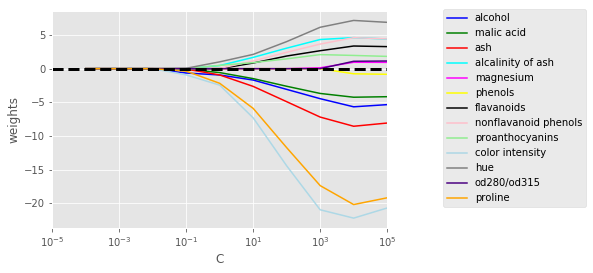

In [96]:
#plot reg path

fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', 
                           C=10.0**c,
                           random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df.columns[column + 1], color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10.0**(-5), 10.0**5])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('weights')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

### sequential feature selection

### Sequential Backward Selection [SBS] -- from scratch

In [121]:
class SBS():
    
    def __init__(self, estimator, k, scoring=accuracy_score, test_size=.25, random_state=1):
        self.scoring = scoring
        self.estimator = estimator
        self.k = k
        self.test_size = test_size
        self.random_state = random_state
        
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        return self.scoring(y_test, y_pred)
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
            
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]

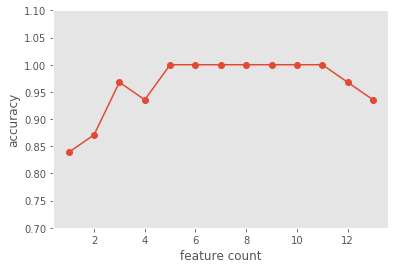

In [122]:
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k=1, scoring=accuracy_score)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim(([.7, 1.1]))
plt.ylabel('accuracy')
plt.xlabel('feature count')
plt.grid()
plt.show()

In [123]:
k3 = list(sbs.subsets_[len(df.columns)-5-1])
df.columns[1:][k3]

Index(['alcohol', 'malic acid', 'alcalinity of ash', 'hue', 'proline'], dtype='object')

In [124]:
# original
knn.fit(X_train_std, y_train)
print('TRAIN ACCURACY:', knn.score(X_train_std, y_train))
print('TEST ACCURACY:', knn.score(X_test_std, y_test))

TRAIN ACCURACY: 0.9838709677419355
TEST ACCURACY: 0.9444444444444444


In [125]:
# with sbs
knn.fit(X_train_std[:, k3], y_train)
print('TRAIN ACCURACY:', knn.score(X_train_std[:, k3], y_train))
print('TEST ACCURACY:', knn.score(X_test_std[:, k3], y_test))

TRAIN ACCURACY: 0.9596774193548387
TEST ACCURACY: 0.9629629629629629


### random forest feature importance

In [132]:
feat_labels = df.columns[1:]

rf = RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) color intensity                0.182483
 2) proline                        0.158610
 3) flavanoids                     0.150948
 4) od280/od315                    0.131987
 5) alcohol                        0.106589
 6) hue                            0.078243
 7) phenols                        0.060718
 8) alcalinity of ash              0.032033
 9) malic acid                     0.025400
10) proanthocyanins                0.022351
11) magnesium                      0.022078
12) nonflavanoid phenols           0.014645
13) ash                            0.013916


In [133]:
X_selected = rf.transform(X_train, threshold=.1)
X_selected.shape

AttributeError: 'RandomForestClassifier' object has no attribute 'transform'

In [ ]:
rf.